<a href="https://colab.research.google.com/github/somilvasal/Covid-AI/blob/main/Copy_of_Testing_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## importing necessary libraries

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import cv2
import os


print('Library Importing Complete')

Library Importing Complete


In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/Covid Thesis/logs'
# %reload_ext tensorboard

## Loading data

In [ ]:
!git clone https://github.com/Rajsoni03/MyData.git

Cloning into 'MyData'...
remote: Enumerating objects: 7250, done.
remote: Total 7250 (delta 0), reused 0 (delta 0), pack-reused 7250
Receiving objects: 100% (7250/7250), 524.06 MiB | 38.82 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (7261/7261), done.


In [ ]:
data_path = '/content/MyData/data'

print("loading images", end='')
imagePaths = list(paths.list_images(data_path))
print(f' : {len(imagePaths)} images in data directory')
data, labels = [], []

_C, _N, _P = 1,1,1

# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if label == 'covid' and _C <= 1000:
      data.append(image)
      labels.append(label)
      _C += 1
    if label == 'normal' and _N <= 2150:
      data.append(image)
      labels.append(label)
      _N += 1
    if label == 'pneumonia' and _P <= 2150:
      data.append(image)
      labels.append(label)
      _P += 1


data = np.array(data) / 255.0
labels = np.array(labels)

print('encoding the labels')
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# labels = to_categorical(labels) # for 2 classes

print(f"Total {len(data)} images are loaded")
print(f"Data Shape : {data.shape} \nLebals Shape : {labels.shape}")

loading images : 7256 images in data directory
encoding the labels
Total 5000 images are loaded
Data Shape : (5000, 224, 224, 3) 
Lebals Shape : (5000, 3)


In [ ]:
trainX, tempX, trainY, tempY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=43)

testX, valX, testY, valY = train_test_split(tempX, tempY, test_size=0.5, random_state=5)

print(f'Training Images: {trainX.shape[0]} \nTesting Images: {testX.shape[0]} \nValidation Images: {valX.shape[0]}')

Training Images: 4000 
Testing Images: 500 
Validation Images: 500


## Loading Models

In [ ]:

print('Loading models')
VGG16_model = load_model('/content/drive/My Drive/Covid Thesis/models/VGG16_v1.3.h5')
ResNet50_model = load_model('/content/drive/My Drive/Covid Thesis/models/ResNet50_v1.0.h5')
DenseNet121_model = load_model('/content/drive/My Drive/Covid Thesis/models/DenseNet121_v1.3.h5')
InceptionV3_model = load_model('/content/drive/My Drive/Covid Thesis/models/InceptionV3_v1.3.h5')
Xception_model = load_model('/content/drive/My Drive/Covid Thesis/models/Xception_v1.3.h5')
print('Done')


Loading models
Done


## Evaluate Model

Classification Report of VGG16 model
              precision    recall  f1-score   support

       covid       0.98      0.94      0.96        68
      normal       0.97      0.96      0.97       220
   pneumonia       0.94      0.97      0.96       212

    accuracy                           0.96       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[[ 64   0   4]
 [  0 212   8]
 [  1   6 205]]



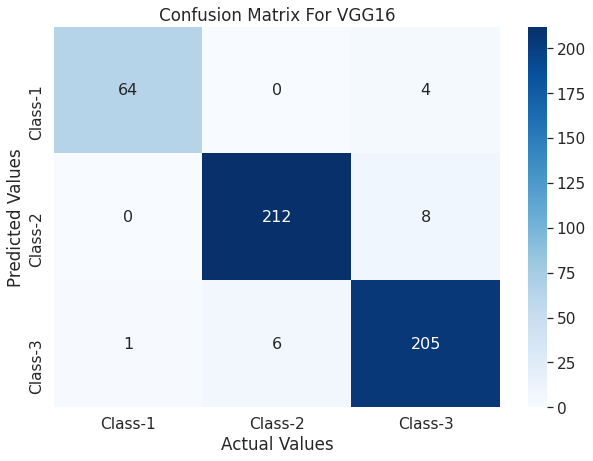


-----------------------------------------------------------



In [ ]:
BS = 10

def evaluate(model, name, H=None):
  tic = time.time()


  # # plot the training loss and accuracy
  # N = EPOCHS
  # plt.style.use("ggplot")
  # plt.figure()
  # plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
  # plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
  # plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
  # plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
  # # plt.title("Training Loss and Accuracy on COVID-19 Dataset ")
  # plt.title(f'{name} Model')
  # plt.xlabel("Epoch #")
  # plt.ylabel("Loss/Accuracy")
  # plt.legend(loc="lower left")
  # plt.savefig("/content/drive/My Drive/Hybrid Model Thesis/graphs/{}.png".format(name))
  # plt.show()

  # make predictions on the testing set
  print(f"Classification Report of {name} model")
  predIdxs = model.predict(valX, batch_size=BS)
  # for each image in the testing set we need to find the index of the
  # label with corresponding largest predicted probability
  predIdxs = np.argmax(predIdxs, axis=1)
  # show a nicely formatted classification report
  cf = classification_report(valY.argmax(axis=1), predIdxs, target_names=lb.classes_)
  print(cf)
  # compute the confusion matrix and and use it to derive the raw
  # accuracy, sensitivity, and specificity
  cm = confusion_matrix(valY.argmax(axis=1), predIdxs)
  print(cm, end='\n\n')
  import seaborn as sn
  import pandas as pd
  import matplotlib.pyplot as plt


  plt.figure(figsize=(10,7))
  sn.set(font_scale=1.4)

  sn.heatmap(cm,
             annot=True,
             annot_kws={"size": 16},
             xticklabels=['Class-1', 'Class-2', 'Class-3'],  
             yticklabels=['Class-1', 'Class-2', 'Class-3'],
             fmt='g',
              cmap='Blues')

  # grlabels = [f'{v1}\n{v2}' for v1, v2 in zip(cm.flatten(),(cm/np.sum(cm)).flatten())]
  # grlabels = np.asarray(grlabels).reshape(3,3)
  # print(grlabels)


  # sn.heatmap((cm/np.sum(cm)),
  #             annot=True,
  #             fmt='.2%',
  #            xticklabels=['Class-1', 'Class-2', 'Class-3'],  
  #            yticklabels=['Class-1', 'Class-2', 'Class-3'],
  #             cmap='Blues',)
  plt.title('Confusion Matrix For {}'.format(name))
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()



  # total = np.sum(cm)

  # TP1, FP1, FN1, TN1 = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
  # total1 = cm[0, 0]+cm[1, 0]+cm[0, 1]+cm[1, 1]

  # acc1 = (TP1 + TN1) / total1
  # sensitivity1 = TP1 / (TP1+FN1)
  # specificity1 = TN1 / (FP1+TN1)
  # print("\n\nacc: {:.4f}".format(acc1),"\tsensitivity: {:.4f}".format(sensitivity1),"\tspecificity: {:.4f}".format(specificity1))

  toc = time.time()
  # print(f'Evaluation Runtime {(toc-tic)} Seconds')

  print('\n-----------------------------------------------------------\n')
evaluate(VGG16_model, 'VGG16')

Classification Report of VGG16 model
              precision    recall  f1-score   support

       covid       0.98      0.94      0.96        68
      normal       0.97      0.96      0.97       220
   pneumonia       0.94      0.97      0.96       212

    accuracy                           0.96       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[[ 64   0   4]
 [  0 212   8]
 [  1   6 205]]



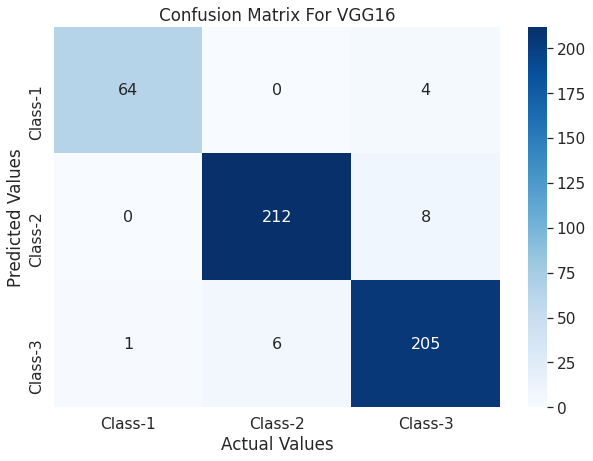


-----------------------------------------------------------

Classification Report of ResNet50 model
              precision    recall  f1-score   support

       covid       1.00      0.69      0.82        68
      normal       0.90      0.95      0.93       220
   pneumonia       0.95      0.98      0.97       212

    accuracy                           0.93       500
   macro avg       0.95      0.88      0.90       500
weighted avg       0.93      0.93      0.93       500

[[ 47  20   1]
 [  0 210  10]
 [  0   4 208]]



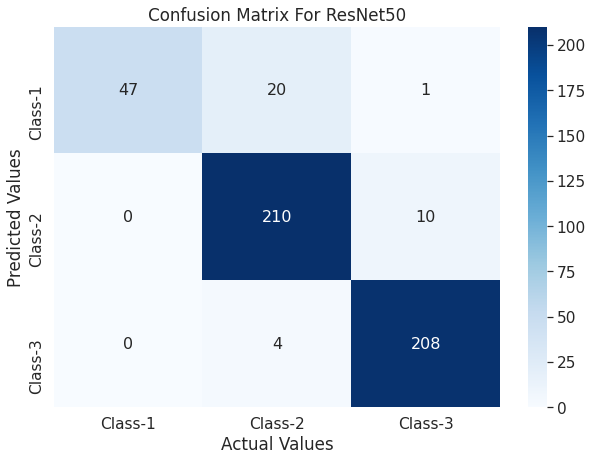


-----------------------------------------------------------

Classification Report of DenseNet121 model
              precision    recall  f1-score   support

       covid       0.99      0.97      0.98        68
      normal       0.98      0.99      0.99       220
   pneumonia       1.00      0.99      0.99       212

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500

[[ 66   2   0]
 [  1 218   1]
 [  0   2 210]]



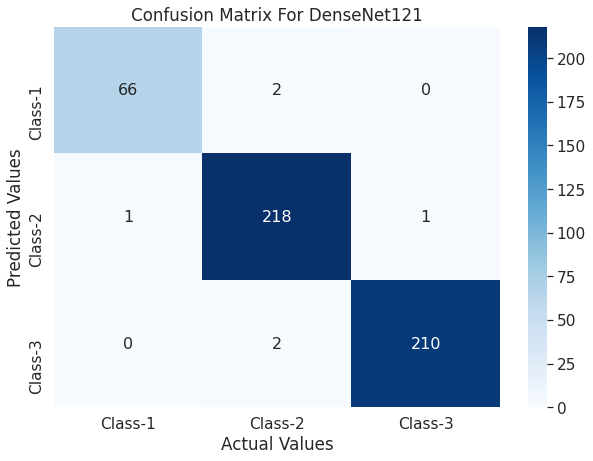


-----------------------------------------------------------

Classification Report of InceptionV3 model
              precision    recall  f1-score   support

       covid       1.00      0.68      0.81        68
      normal       0.92      0.99      0.95       220
   pneumonia       0.97      0.99      0.98       212

    accuracy                           0.95       500
   macro avg       0.96      0.88      0.91       500
weighted avg       0.95      0.95      0.94       500

[[ 46  18   4]
 [  0 217   3]
 [  0   2 210]]



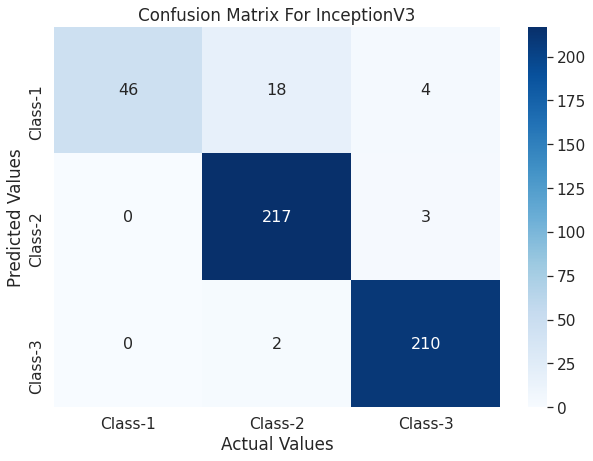


-----------------------------------------------------------

Classification Report of Xception model
              precision    recall  f1-score   support

       covid       0.99      1.00      0.99        68
      normal       0.96      1.00      0.98       220
   pneumonia       1.00      0.96      0.98       212

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[ 68   0   0]
 [  0 219   1]
 [  1   8 203]]



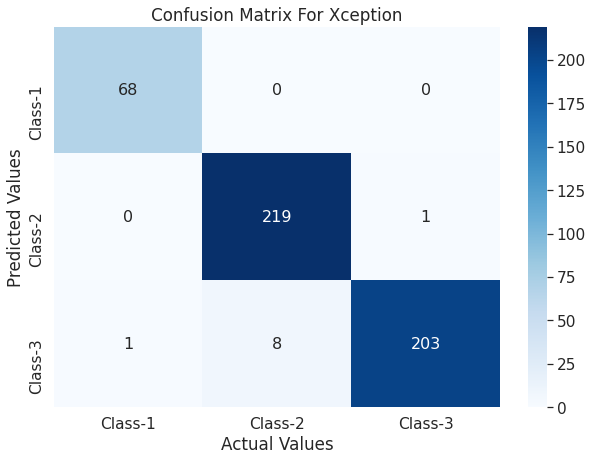


-----------------------------------------------------------



In [ ]:
evaluate(VGG16_model, 'VGG16')
evaluate(ResNet50_model, 'ResNet50')
evaluate(DenseNet121_model, 'DenseNet121')
evaluate(InceptionV3_model, 'InceptionV3')
evaluate(Xception_model, 'Xception')

In [ ]:
evaluate(VGG16_model, 'VGG16')  
evaluate(ResNet50_model, 'ResNet50')
evaluate(DenseNet121_model, 'DenseNet121')
evaluate(InceptionV3_model, 'InceptionV3')
evaluate(Xception_model, 'Xception')

[INFO] evaluating VGG16 model...
              precision    recall  f1-score   support

       covid       0.99      0.99      0.99        72
      normal       0.96      0.95      0.96       213
   pneumonia       0.96      0.97      0.96       215

    accuracy                           0.96       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.96      0.96      0.96       500

[[ 71   1   0]
 [  1 203   9]
 [  0   7 208]]
Evaluation Runtime 1.7779879570007324 Seconds

-----------------------------------------------------------

[INFO] evaluating ResNet50 model...
              precision    recall  f1-score   support

       covid       0.96      0.61      0.75        72
      normal       0.86      0.92      0.89       213
   pneumonia       0.93      0.98      0.95       215

    accuracy                           0.90       500
   macro avg       0.92      0.84      0.86       500
weighted avg       0.91      0.90      0.90       500

[[ 44  28   0]


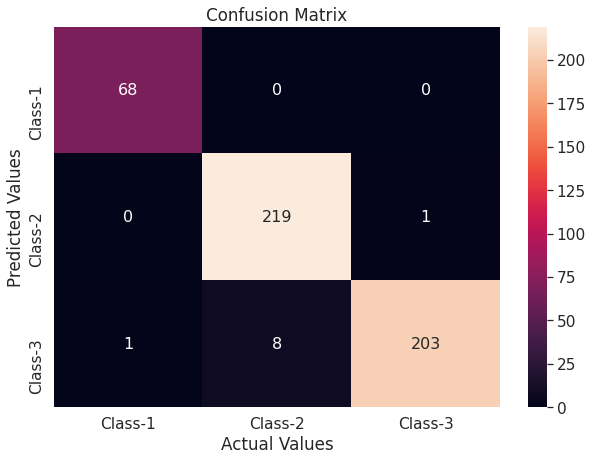

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[ 68 ,  0,   0],
 [  0 ,219   ,1],
 [  1   ,8 ,203]]

df_cm = pd.DataFrame(array, range(3), range(3), dtype='int32')
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['Class-1', 'Class-2', 'Class-3'],  yticklabels=['Class-1', 'Class-2', 'Class-3'],  fmt='g') # font size
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()